## Algoritmo: Naive Bayes

En este ejemplo se utiliza el algoritmo de clasificación: **Naive Bayes** para predecir no comprar o comprar una casa.

| Variable       | Tipo             | Descripción                                         |
|----------------|------------------|-----------------------------------------------------|
| ingresos       | numérico entero  | Es el ingreso mensual de una familia                |
| gastos_comunes | numérico entero  | Pagos relacionados con servicios públicos y otros gastos mensuales |
| pago_coche     | numérico entero  | Cuota por pago de un auto y gastos de combustible   |
| gastos_otros   | numérico entero  | Gastos relacionados a compras y lo necesario para el mes |
| ahorros        | numérico entero  | Suma de ahorros dispuestos para comprar la casa     |
| vivienda       | numérico entero  | Precio de la vivienda que se quiere comprar         |
| estado_civil   | numérico entero  | 0-Soltero, 1-Casado, 2-Divorciado                   |
| hijos          | numérico entero  | Número de hijos menores de edad                     |
| trabajo        | numérico entero  | 0-Sin empleo, 1-Independiente, 2-Empleado, 3-Empresario, 4-Pareja: autónomos, 5-Pareja: empleados, 6-Pareja: autónomo y asalariado, 7-Pareja: empresario y autónomo , 8-Pareja: empresarios los dos | 
| comprar        | numérico entero  | 0-No comprar 1-Comprar casa (clase)                        |

### Paso 1: Importar las librerias

In [2]:
# Libreria para operaciones matemáticas o estadísticas
import numpy as np
# Libreria para manejo de datos
import pandas as pd
# Librerias para gráficas
import matplotlib.pyplot as plt
import seaborn as sb
# Libreria para separar el conjunto de datos (entrenamiento y pruebas)
from sklearn.model_selection import train_test_split
# Librería para Naive Bayes
from sklearn.naive_bayes import GaussianNB
# Libreria para generar la métrica: matriz de confusión
from sklearn.metrics import confusion_matrix
# Libreria para generar el reporte de clasificación
from sklearn.metrics import classification_report

### Paso 2: Cargar el archivo plano en un DataFrame

In [3]:
# Se cargan los datos del archivo plano: '1.6-comprar_alquilar.csv' a un DataFrame
data = pd.read_csv("data/1.6-comprar_alquilar.csv")

### Paso 3: Explorar los datos

In [4]:
# Se muestran los primeros 10 registros del DataFrame
data.head(10)

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
5,5692,911,11,325,50875,360863,1,4,5,1
6,6830,1298,345,309,46761,429812,1,1,5,1
7,6470,1035,39,782,57439,606291,0,0,1,0
8,6251,1250,209,571,50503,291010,0,0,3,1
9,6987,1258,252,245,40611,324098,2,1,7,1


In [5]:
# Se cuentan los registros con valor 0 y 1 (es decir no comprar y comprar la casa)
no_comprar = np.sum(data['comprar'] == 0)
comprar = np.sum(data['comprar'] == 1)

print("No comprar =", no_comprar)
print("Comprar =", comprar)

No comprar = 135
Comprar = 67


In [6]:
# También se pueden agrupar y traer su tamaño (0- No comprar, 1- Comprar)
print(data.groupby('comprar').size())

comprar
0    135
1     67
dtype: int64


##### NOTA: Los datos están desbalanceados, se debería aplicar la técnica de balanceo que incluye **Oversampling** o **undersampling**. Sin embargo, este proceso lo realizaremos con el algoritmo: Árbol de Decisión (siguiente ejemplo).

### Paso 4: Generar las visualizaciones

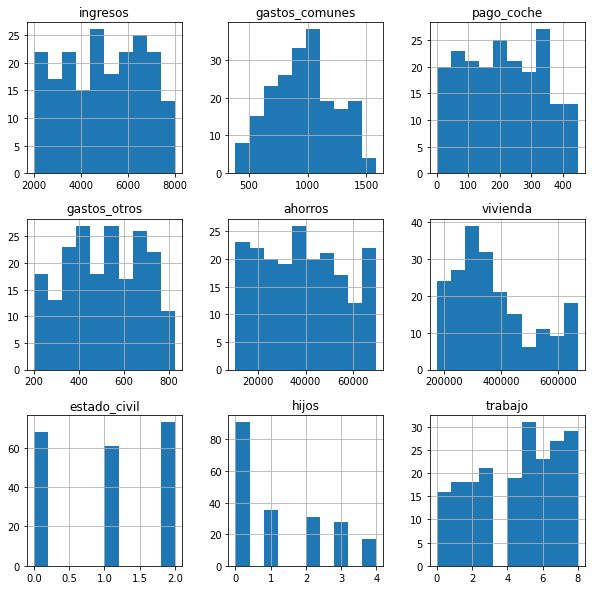

In [8]:
# Se genera el histograma de los datos, pero se excluye la clase (no comprar o comprar) porque es lo que queremos predecir.
data.drop(['comprar'], axis=1).hist() # La columna se elimina de manera temporal, es decir solo para la gráfica
plt.rcParams['figure.figsize'] = (10, 10)
plt.show()

In [7]:
# Se verifica que todas las columnas están en el DataFrame data
data.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1


### Paso 5: Procesar los datos
* Se agrupan los diversos gastos (gastos_comunes, gastos_otros, pago coche)
* Se crea una columna denominada financiar, que resta el precio de la vivienda con los ahorros de la familia
* Luego se eliminan las columnas: gastos_comunes, gastos_otros y pago_coche

In [8]:
# Agrupo los gastos
data['gastos'] = (data['gastos_comunes'] + data['gastos_otros'] + data['pago_coche'])
# Defino financiar
data['financiar'] = (data['vivienda'] - data['ahorros'])
# Elimino las columnas que están agrupadas (gastos_comunes, gastos_otros, pago_coche) del DataFrame
data = data.drop(['gastos_comunes', 'gastos_otros', 'pago_coche'], axis=1)

# Imprimo los primeros 10 registros del DataFrame con las nuevas columnas
data.head(10)

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos,financiar
0,6000,50000,400000,0,2,2,1,1600,350000
1,6745,43240,636897,1,3,6,0,1496,593657
2,6455,57463,321779,2,1,8,1,1926,264316
3,7098,54506,660933,0,0,3,0,1547,606427
4,6167,41512,348932,0,0,3,1,1606,307420
5,5692,50875,360863,1,4,5,1,1247,309988
6,6830,46761,429812,1,1,5,1,1952,383051
7,6470,57439,606291,0,0,1,0,1856,548852
8,6251,50503,291010,0,0,3,1,2030,240507
9,6987,40611,324098,2,1,7,1,1755,283487


In [9]:
# Se generan las estadísticas de los datos
data.describe()

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos,financiar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683,1698.752475,334599.970297
std,1682.862556,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988,324.838005,126607.099497
min,2008.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000,1007.000000,154716.000000
25%,3513.750000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000,1430.500000,240410.250000
50%,4947.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000,1669.500000,301177.000000
75%,6374.500000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000,1928.000000,393413.000000
max,7984.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000,2543.000000,618621.000000


##### NOTA: Las estadísticas permiten identificar: menor valor, mayor valor, media, desviación estándar (SD), mediana y cuartiles para las columnas numéricas del DataFrame.

### Paso 6: Se genera la correlación  entre las características o variables 

<AxesSubplot:title={'center':'Correlación Pearson de las características (variables)'}>

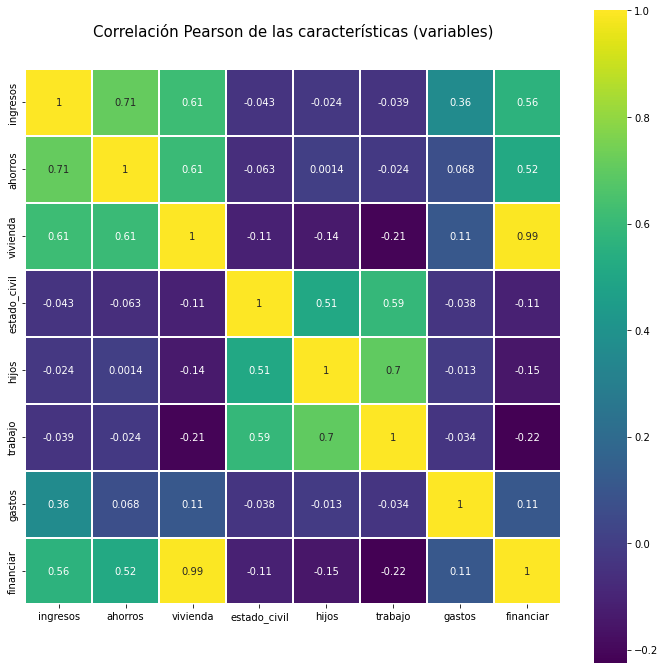

In [10]:
# Se genera la correlación Pearson para las características
used_features = ['ingresos','ahorros','vivienda','estado_civil','hijos','trabajo', 'gastos', 'financiar']
 
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title("Correlación Pearson de las características (variables)", y=1.05, size=15)
sb.heatmap(data[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, 
           cmap=colormap, linecolor='white', annot=True)

##### NOTA: Se puede observar que las variables con mayor correlación son ahorros e ingresos (0.71). Recuerde que existen varios tipos de correlación: Pearson, Spearman, Kendall, entre otros. En este ejemplo utilizamos Pearson.

### Paso 6: Generar la predicción con el algoritmo Gaussian Naive Bayes de la librería SKLearn

In [16]:
# Se deja en X todas las características para el modelo
features = ['ingresos','ahorros','vivienda','estado_civil','hijos','trabajo', 'gastos', 'financiar']
X = data[features]
# Se deja en y la clase (no comprar o comprar) porque es lo que queremos predecir
y = data['comprar'].values

# Dividimos el conjunto de datos en entrenamiento (80%) y pruebas (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=6) 

# Creamos el modelo, lo ponemos a aprender con fit() y obtenemos predicciones sobre nuestro conjunto de test
# Se instancia el clasificador 
nb = GaussianNB()
# Se entrena el clasificador
nb.fit(X_train, y_train)
# Se genera la predicción
prediccion = nb.predict(X_test)

# Se imprime la matriz de confusión
print(confusion_matrix(y_test, prediccion))
# Se imprime la Accuracy del modelo
print(classification_report(y_test, prediccion))

[[23  1]
 [ 4 13]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        24
           1       0.93      0.76      0.84        17

    accuracy                           0.88        41
   macro avg       0.89      0.86      0.87        41
weighted avg       0.88      0.88      0.88        41



##### NOTA: Se puede observar que el accuracy del modelo es del 0.88%. Sin embargo, esta métrica no es tan precisa como: F1 score, que requiere de la **precision** y el **recall**. En el próximo ejercicio utilizaremos esta métricas (ejemplo árbol de decisión).

In [40]:
# Se genera una predicción con datos nuevos
#                ['ingresos', 'ahorros', 'vivienda', 'estado_civil', 'hijos', 'trabajo', 'gastos', 'financiar']
print( nb.predict([[2000,      5000,      800000,     1,              4,       2,         1950,     15800]]) )
#Resultado esperado 0-No comprar, 1-Comprar casa
# Para el caso recomienda alquilar [0]

[0]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
